In [1]:
import pandas as pd
import numpy as np

# Read dataset to the python environment


In [2]:
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape



(8124, 23)

In [4]:
data.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# Splitting data into Feature and Target

In [6]:
X=data.drop(['class'],axis=1)
Y=data['class']

In [7]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
Y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

# Applying label encoding and one-hot encoding

In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [10]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
# One hot encoding
X=pd.get_dummies(X)

In [12]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# 1. Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred=lr.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [17]:
accuracy_score(y_test,y_pred)

1.0

In [18]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

# 2. KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    kn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    acc_values.append(acc_score)
print(acc_values)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9993846153846154]


Text(0, 0.5, 'accuracy')

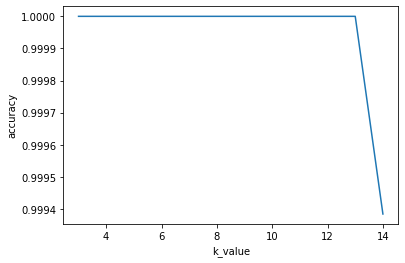

In [20]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values,)
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [21]:
kn=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)

In [22]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

# 3. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [24]:
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

# 4. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [26]:
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

# 5. Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred=nb.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred)

0.96

In [30]:
confusion_matrix(y_test,y_pred)


array([[778,  65],
       [  0, 782]], dtype=int64)

In [31]:
from sklearn.naive_bayes import BernoulliNB
bc=BernoulliNB()
bc.fit(x_train,y_train)

BernoulliNB()

In [32]:
y_pred=bc.predict(x_test)


In [33]:
accuracy_score(y_test,y_pred)


0.936

In [34]:
confusion_matrix(y_test,y_pred)

array([[827,  16],
       [ 88, 694]], dtype=int64)

# In all the models we got accuracy score above 90%